In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
#from sklearn.cross_validate import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
red_wine = pd.read_csv('winequality-red.csv',sep=";")
white_wine = pd.read_csv('winequality-white.csv',sep=";")
# Create a variable that says what color the wine is
red_wine['color']='red'
white_wine['color']='white'

In [19]:
wine_data = pd.concat([red_wine, white_wine])
wine_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [21]:
#model = PLSRegression(scale=False)
color_dum=pd.get_dummies(wine_data.color) # create dummy variable for the wine color
wine_data=pd.concat([wine_data,color_dum],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e6c0978>,
      dtype=object)

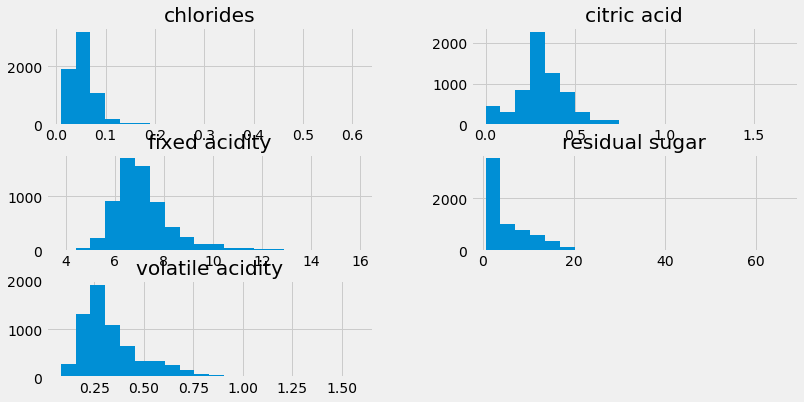

In [22]:
wine_data[['fixed acidity','volatile acidity', 'citric acid','chlorides','residual sugar']].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e317b70>,
      dtype=object)

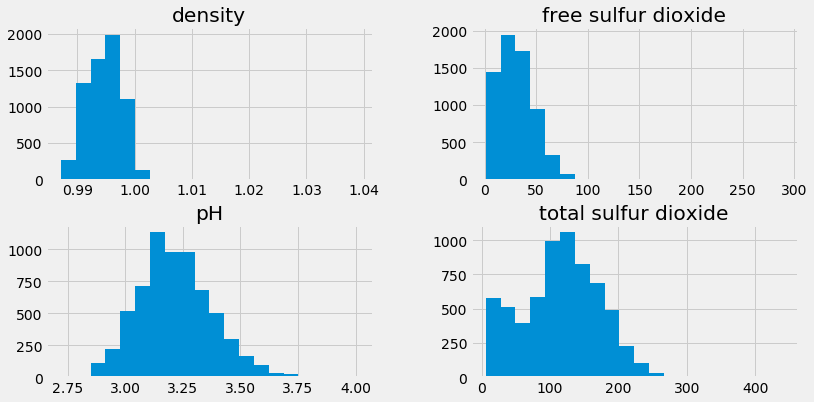

In [23]:
#score = cross_val_score(model, wine_data.iloc[:,:-1], wine_data.iloc[:,-1], scoring='neg_mean_absolute_error')
#print(score.mean())
wine_data[['free sulfur dioxide','total sulfur dioxide', 'density','pH']].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ee14ef0>,
      dtype=object)

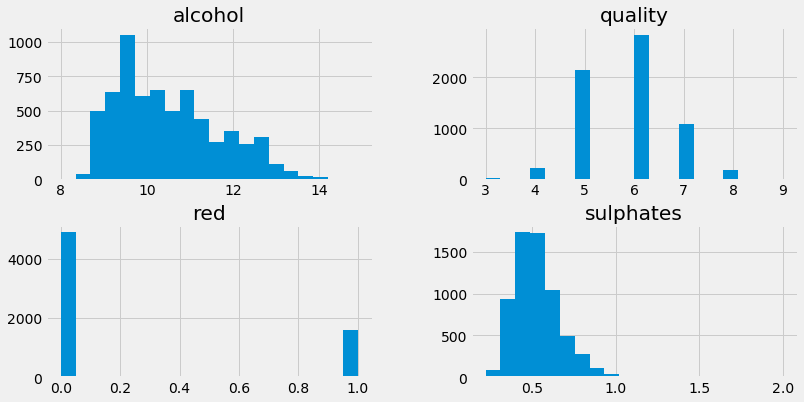

In [24]:
wine_data[['sulphates','alcohol', 'quality','red']].hist(bins=20)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


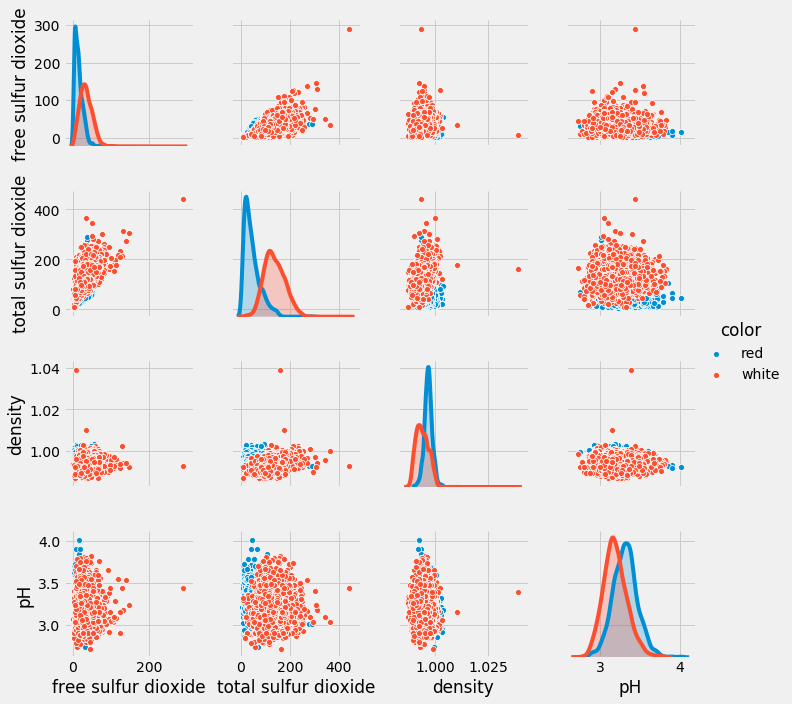

In [25]:
#wine_data.skew()
sns.pairplot(wine_data[['free sulfur dioxide','total sulfur dioxide', 'density','pH','color']],hue='color')

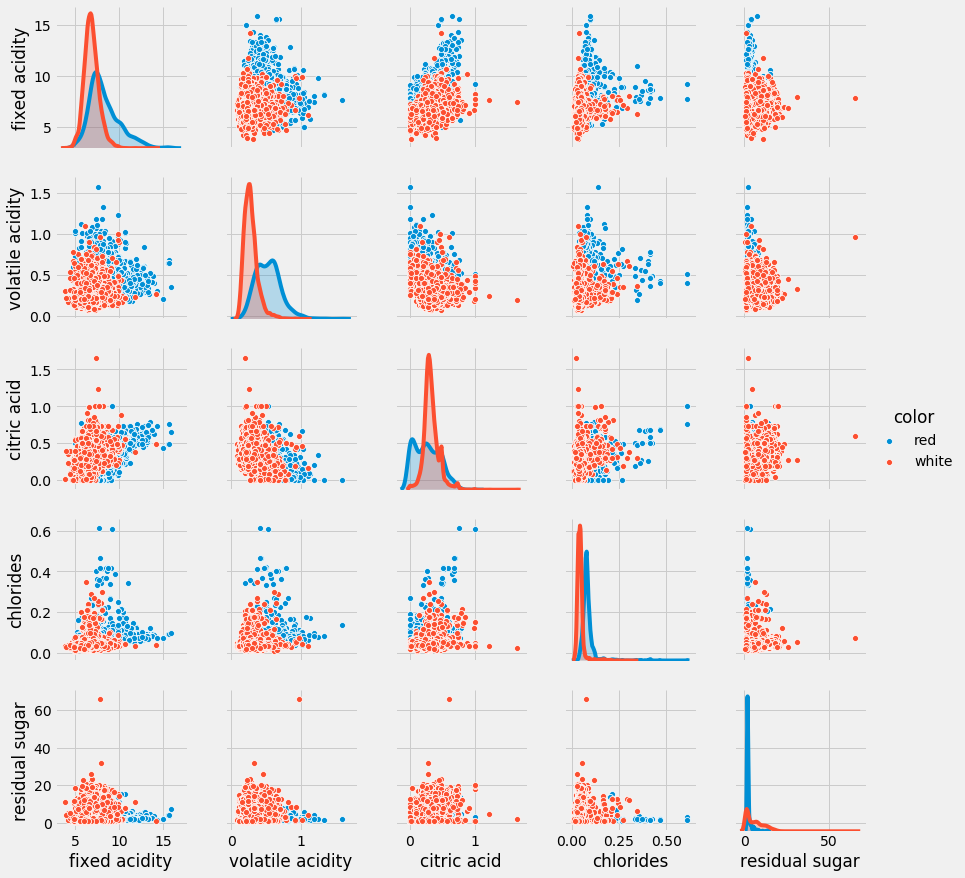

In [26]:
#wine_data.describe()
sns.pairplot(wine_data[['fixed acidity','volatile acidity', 'citric acid','chlorides','residual sugar','color']],hue='color')

Text(0, 0.5, 'Number of observations')

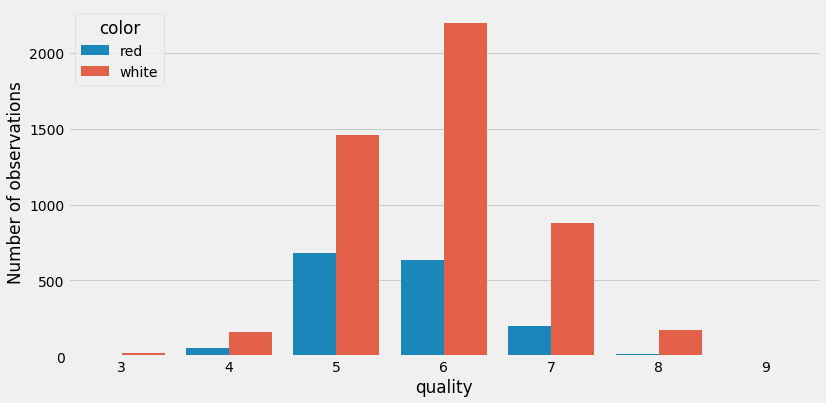

In [27]:
#wine_data.quality.value_counts()
sns.countplot(wine_data.quality,hue=wine_data.color)
plt.ylabel('Number of observations')

wine_data.quality.value_counts().plot(kind="bar")
Some Notes
1.All the variables appear to be continuous variables besides color which is a dummy variable
2.No missing data
3.Response variable quality is concentrated between 5 and 7
4.The prediction models will struggle to predict values less than 5 and values greater than 7 since they are so few
5.There's a lot more white_wine wine than red wine

In [28]:
# Create a variable that says what color the wine is
#red['color']='red'
#white_wine['color']='white_wine'
wine_data=wine_data.drop(['white','color'],axis=1) #drop one of the dummy variables


In [29]:
cor = wine_data.drop('red',axis=1).corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.40) | (cor < -0.40)] #show variables with at least correlation of 0.4

free sulfur dioxide   residual sugar         0.402871
total sulfur dioxide  volatile acidity      -0.414476
                      residual sugar         0.495482
                      free sulfur dioxide    0.720934
density               fixed acidity          0.458910
                      residual sugar         0.552517
alcohol               density               -0.686745
quality               alcohol                0.444319
dtype: float64

In [30]:
from scipy import stats

In [31]:
x=wine_data.drop(['quality',],axis=1) # 
y=wine_data.quality

In [32]:
white_x=white_wine.drop(['quality','color'],axis=1)
white_y=white_wine.quality
red_x=red_wine.drop(['quality','color'],axis=1)
red_y=red_wine.quality

In [33]:
## Create train and test data for the entire sample
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
## Create train and test data for the white_wine wine sample
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_x, white_y, test_size=0.2, random_state=42)
## Create train and test data for the red whine sample
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_x, red_y, test_size=0.2, random_state=42)

Partial least squares
We need to determine the number of principal components to use in the PLS. This will be determined using 10 folds Cross Validation.
The prediction metric is mean absolute error

In [60]:
n = len(X_train)
#self.cv_set = cross_validation.StratifiedKFold(self.cv_labels, n_folds=n_fold)
#kf_10 =cross_validate(10)
kf_10=cross_validate(10)
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#kf_10=self.cv_set = sklearn.model_selection.StratifiedKFold(self.cv_labels, n_folds=n_fold)
mae = []
for i in range(1, 13):
    pls = PLSRegression(n_components=i)
    score = cross.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='mean_absolute_error').mean()
    mae.append(-score)
    
# Plot results
plt.plot(mae,linewidth=1.8)
plt.xlabel('Number of principal components in regression')
plt.ylabel('MAE')
plt.title('Quality')
plt.xlim(xmin=-1)
#print "Use " + str(np.argmin(mae)) + " components"

TypeError: cross_validate() missing 1 required positional argument: 'X'

In [45]:
pls = PLSRegression(n_components=6)
pls.fit(scale(X_train), y_train)
print(mean_absolute_error(y_test, pls.predict(scale(X_test))))

0.5662826344162869


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Predicted value')

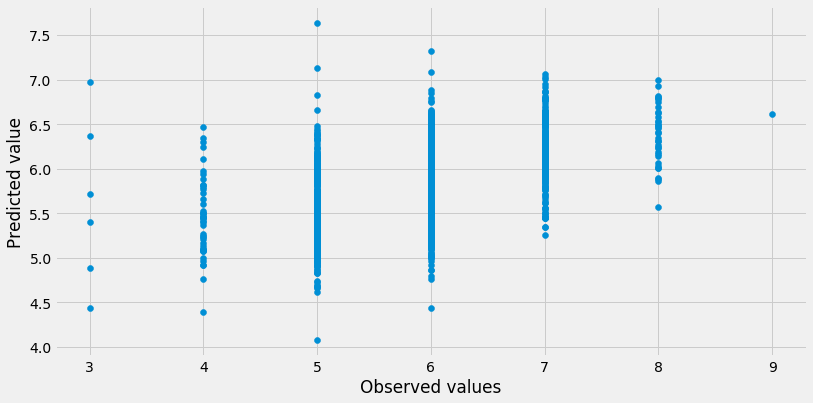

In [46]:
plt.scatter(y_test,pls.predict(scale(X_test)))
plt.xlabel('Observed values')
plt.ylabel('Predicted value')

As expected the model doesn't do very well predicting quality that is neither 5 nor 6. It has too few instances of those qualities to learn from


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


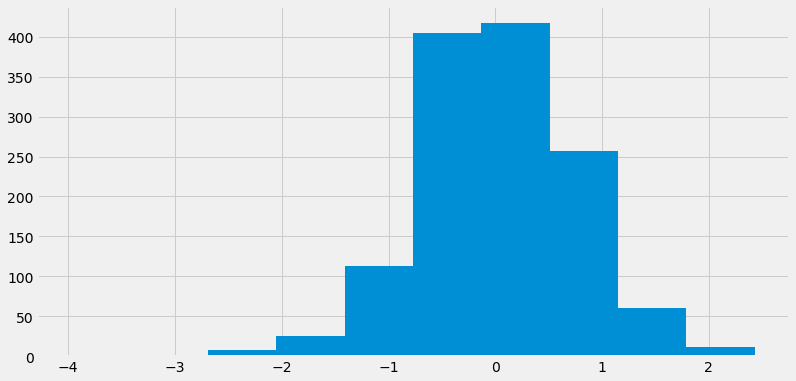

In [47]:
predicted=pd.DataFrame(pls.predict(scale(X_test)),columns={'predicted'})
yy=y_test.reset_index()
(yy['quality']-predicted['predicted']).hist()